## Problem Statement:


#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

##### Prediction :   Make two prediction  
1. Primary Fuel    
2. capacity_mw 

In [819]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [820]:
#import the dataset
data= pd.read_html(r'https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv')
data= data[0]
df= data.copy()

In [821]:
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,NaN,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,NaN,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,NaN,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,NaN,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,NaN,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the Unnamed: 0 column filled with null values.

In [822]:
#dropping the column
df.drop(columns='Unnamed: 0',inplace=True)
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [823]:
#shape of the dataset
df.shape

(907, 27)

In [824]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Some columns need to be encoded. Lets see the target variable "primary_fuel" has imbalanced observations.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


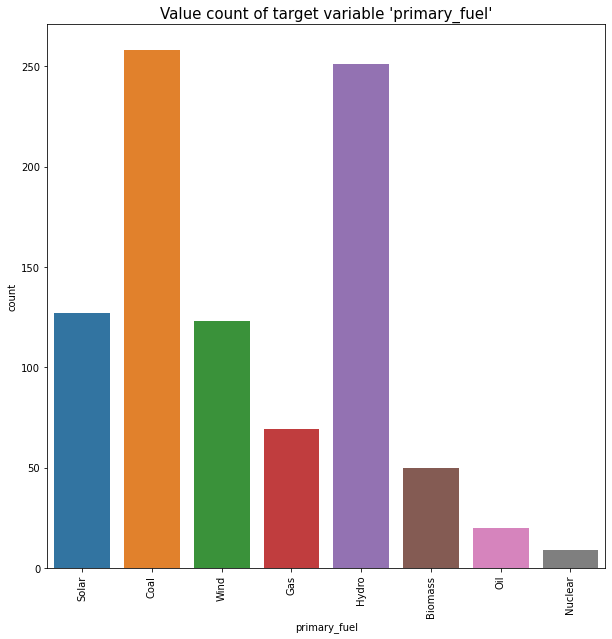

In [825]:
#checking if there's any imbalance in the region target variable
print(df.primary_fuel.value_counts())
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(x='primary_fuel',data=df)
plt.title("Value count of target variable 'primary_fuel'",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [826]:
#Checking number of missing values in the datset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There is a lot of missing values in the dataset.

In [827]:
#descriptive statisctics
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,0.0,527.000000,342,907,907,888,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,NaN,NaN,280,191,304,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,ACME Solar Tower,WRI1020239,NaN,NaN,NaN,Coal,Oil,Oil,NaN,NaN,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,NaN,NaN,4,519,519,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,NaN,1997.091082,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,NaN,17.082868,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


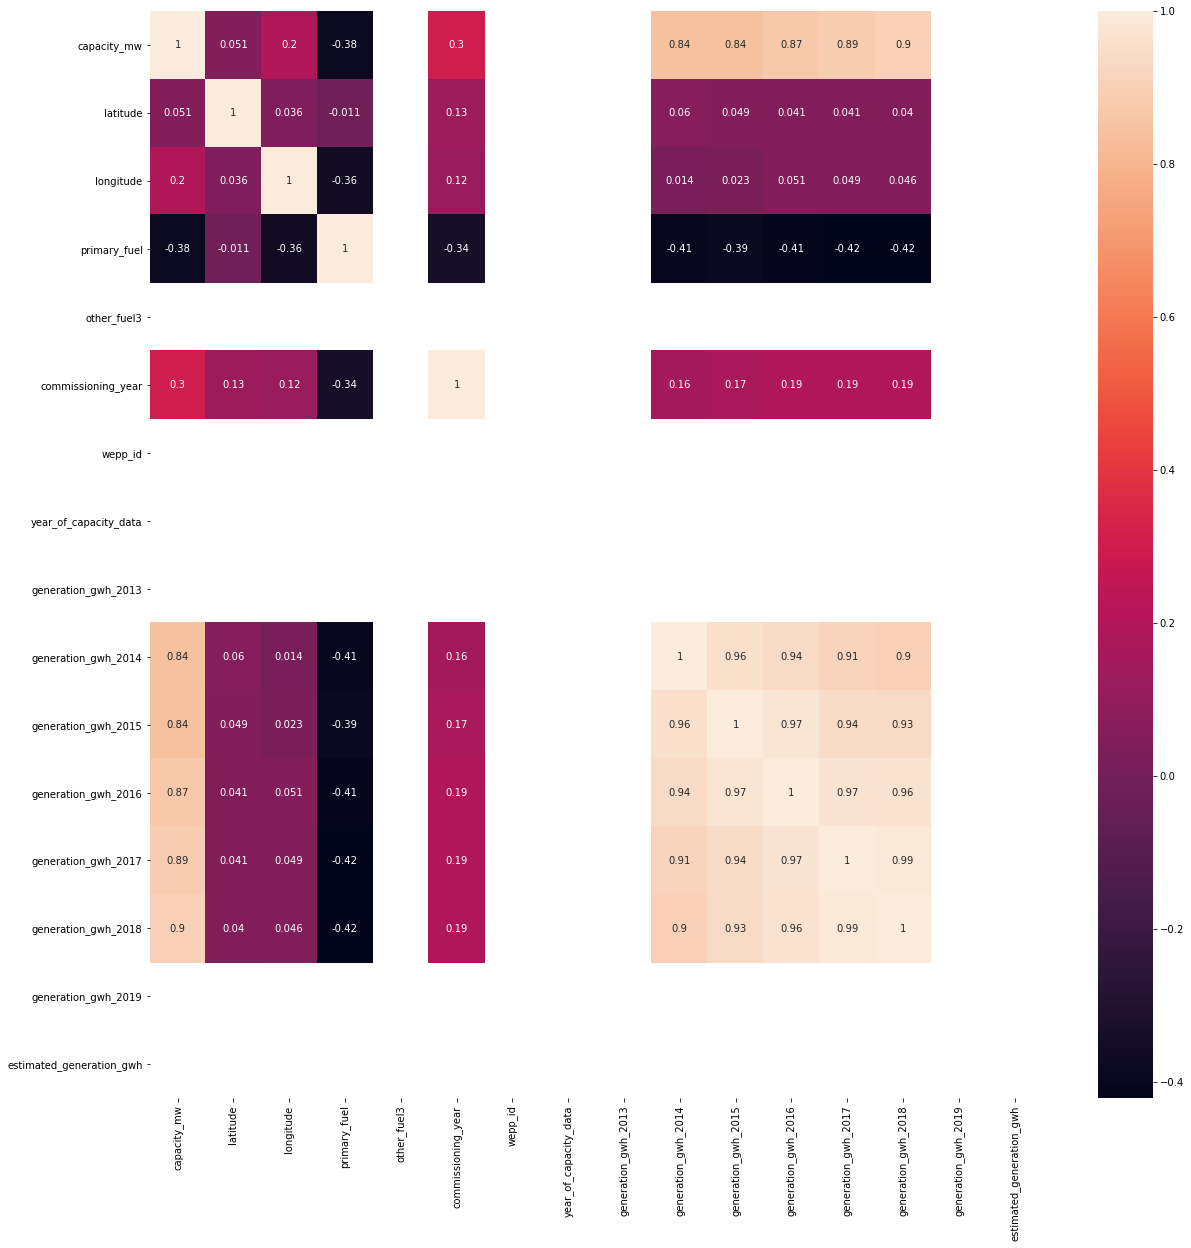

In [828]:
#encoding the target variable ( primary fuel )
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df.primary_fuel= encoder.fit_transform(df.primary_fuel)

#correlation matrix to see which features are less important
corr_data= df.corr()
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(corr_data,annot=True)
plt.show()

**Observation:**
- Dropping the columns where all the observations of that column is null.
- country variable, country_long, year of capacity data & generation data source has their own same values for all the 907 observation and its not usefull for the prediction of model thus dropping them.
- Dropping the name, gppd_idnr, owner, geolocation source, url variables whic are just nominal data for identification purpose only.
- as the correlation heatmap shows there's no major correlation between lat,long,commissioning_year with the target variables
- Dropping the Other fuels columns in which most of the values are null. Thus removing from the dataset

In [829]:
#dropping the above mentioned columns
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','country','country_long',
                'name','gppd_idnr','latitude','longitude','commissioning_year','url','geolocation_source','estimated_generation_gwh',
                'generation_data_source','wepp_id','generation_gwh_2013','year_of_capacity_data',
                 'owner','generation_gwh_2019'],
        inplace=True)

In [830]:
#filling the null values in the generation column
#since the power plant will not run at full capacity so we assume it runs in 75% of the capacity
#and multiplying it with the hours and no of days in a year
generation_per_year=df[['generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']]

for column in generation_per_year.columns:
    df[column]= df[column].fillna(((df.capacity_mw)*0.75*24*365)/1000)

In [831]:
#rechecking if there's any missing values
df.isnull().sum()

capacity_mw            0
primary_fuel           0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

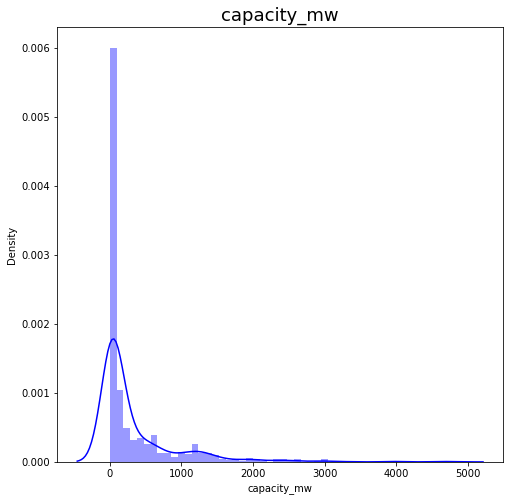

In [832]:
#data distribution of numerical variables 
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.capacity_mw,color='Blue')
plt.title("capacity_mw",fontsize=18)
plt.show()

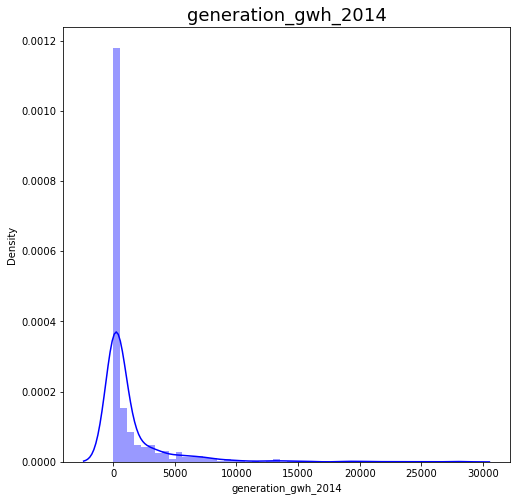

In [833]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.generation_gwh_2014,color='Blue')
plt.title("generation_gwh_2014",fontsize=18)
plt.show()

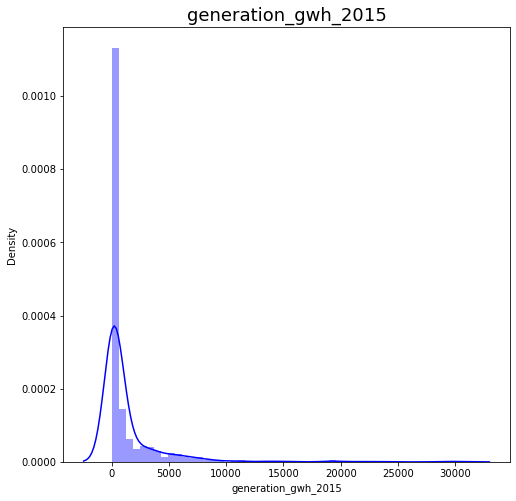

In [834]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.generation_gwh_2015,color='Blue')
plt.title("generation_gwh_2015",fontsize=18)
plt.show()

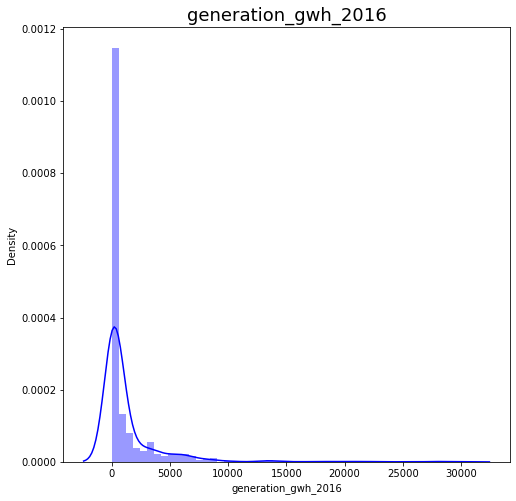

In [835]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.generation_gwh_2016,color='Blue')
plt.title("generation_gwh_2016",fontsize=18)
plt.show()

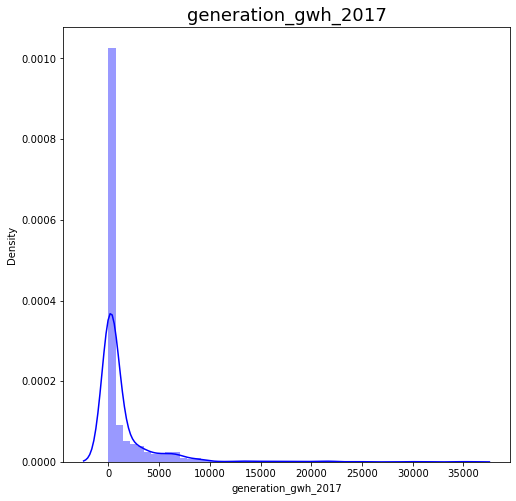

In [836]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.generation_gwh_2017,color='Blue')
plt.title("generation_gwh_2017",fontsize=18)
plt.show()

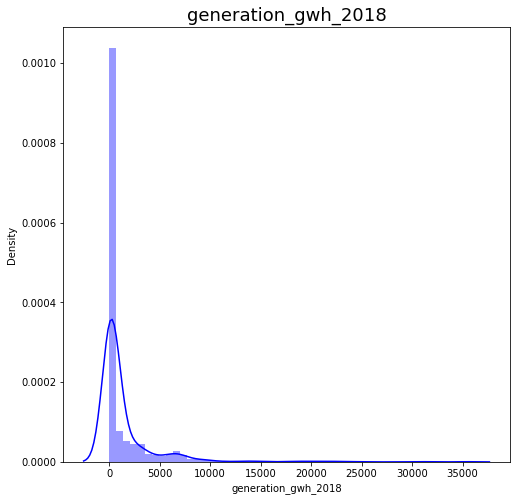

In [837]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df.generation_gwh_2018,color='Blue')
plt.title("generation_gwh_2018",fontsize=18)
plt.show()

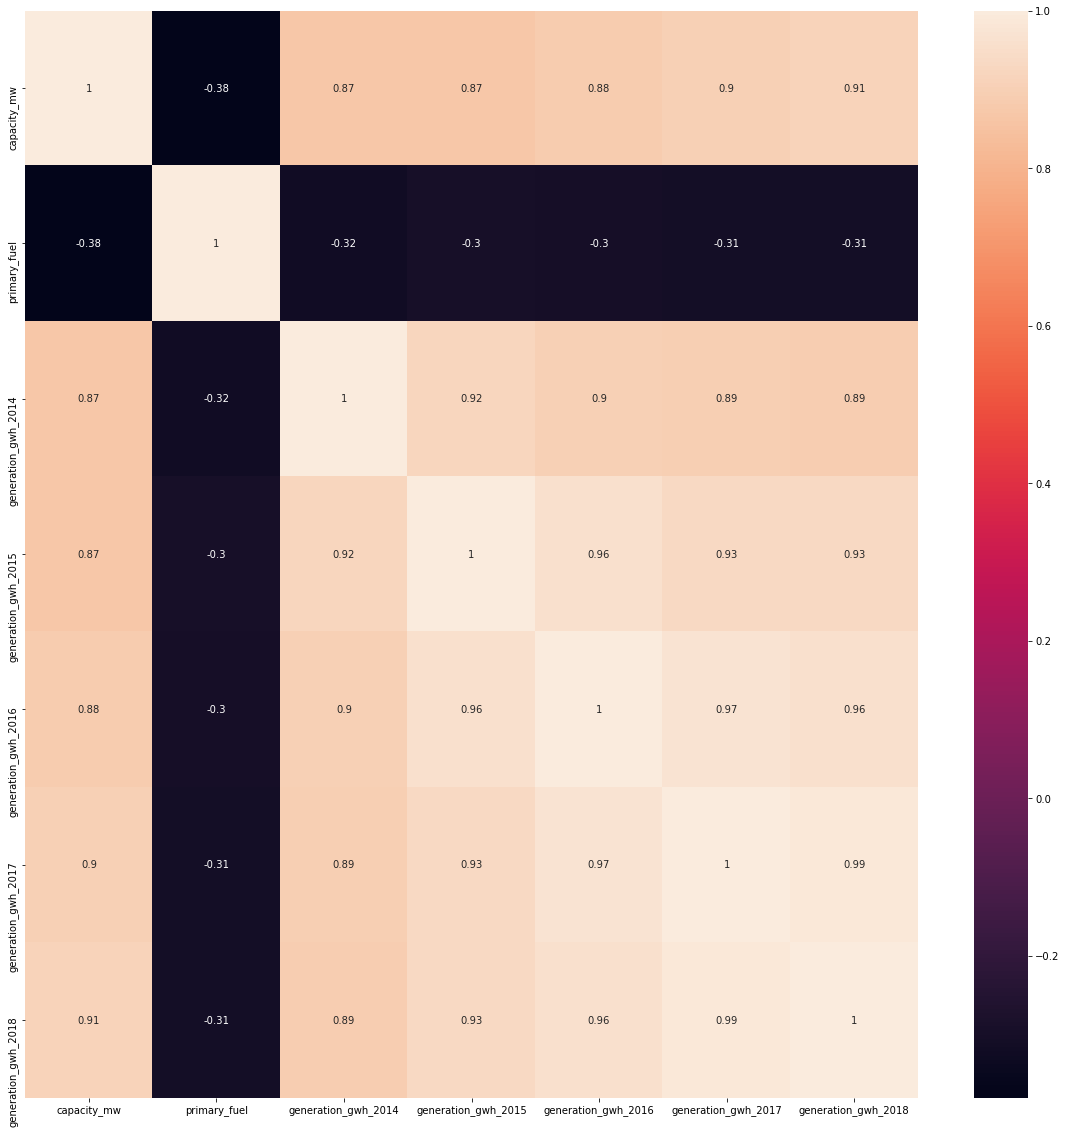

In [838]:
#seeing the correlation with the target variable (region & Average Price) 
#and multicollinearity between the features.
corr_data= df.corr()
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(corr_data,annot=True,)
plt.show()

Heatmap shows that theres a good amount of correlation between the feature and target variable.

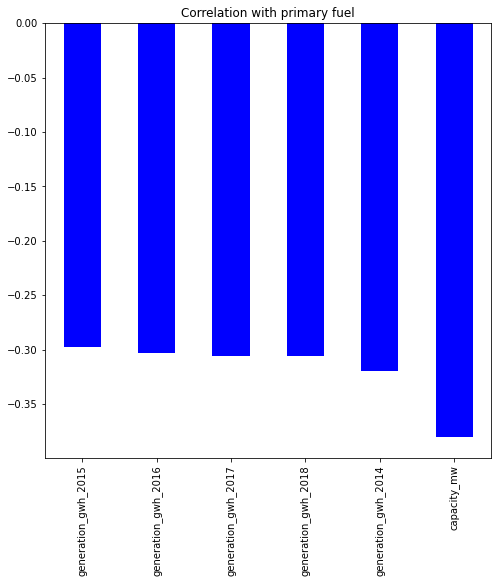

In [839]:
#visualizin the correlation with the target variable primary fuel from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.primary_fuel.sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='b',title='Correlation with primary fuel')
plt.show()

The target variable "Primary Fuel" are highly negatively correlated with features **all the generation** and least negatively correlated with **capacity_mw**.

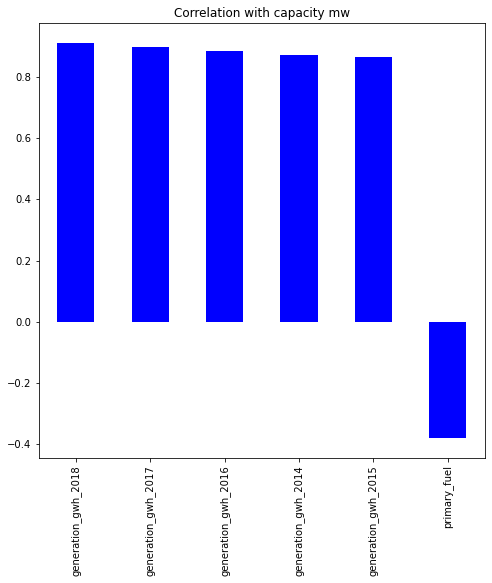

In [840]:
#visualizin the correlation with the target variable capacity mw from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.capacity_mw.sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='b',title='Correlation with capacity mw')
plt.show()

The target variable "Capacity" are highly positively correlated with features **all the generation** and least negatively correlated with **primary fuel**.

In [841]:
#creating copies of the dataset for two model creation
fuel_data= df.copy()
capacity_data= df.copy()

In [842]:
#checking skewness in the dataset
df.skew()

capacity_mw            3.123576
primary_fuel           0.472251
generation_gwh_2014    4.283051
generation_gwh_2015    4.954396
generation_gwh_2016    4.864285
generation_gwh_2017    4.936428
generation_gwh_2018    4.820897
dtype: float64

The varibales are skewed. We need to reduce them using power transformation technique.

In [843]:
#transforming the numerical data to reduce the skewness
from sklearn.preprocessing import power_transform

transformed= pd.DataFrame(power_transform(df.drop(columns=['capacity_mw','primary_fuel','source'])),
                          columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                                  'generation_gwh_2017','generation_gwh_2018'])

for column in df.columns:
    if column in transformed.columns:
        df[column]= transformed[column]
        capacity_data[column]= transformed[column]
        fuel_data[column]= transformed[column]
    

In [844]:
#transforming the capacity variable only for the fuel prediction dataset       
fuel_data['capacity_mw']= power_transform(pd.DataFrame(fuel_data['capacity_mw'],columns=['capacity_mw']))

In [845]:
#checking skewness of each dataset
print("skewness in fuel prediction dataset:\n",fuel_data.skew())
print("\nskewness in capacity prediction dataset:\n",capacity_data.skew())

skewness in fuel prediction dataset:
 capacity_mw            0.022164
primary_fuel           0.472251
generation_gwh_2014   -0.001134
generation_gwh_2015    0.000961
generation_gwh_2016    0.001187
generation_gwh_2017    0.000195
generation_gwh_2018    0.001036
dtype: float64

skewness in capacity prediction dataset:
 capacity_mw            3.123576
primary_fuel           0.472251
generation_gwh_2014   -0.001134
generation_gwh_2015    0.000961
generation_gwh_2016    0.001187
generation_gwh_2017    0.000195
generation_gwh_2018    0.001036
dtype: float64


In [846]:
#checking if there's any outliers in the dataset
from scipy.stats import zscore
index= fuel_data[np.abs(zscore(fuel_data.drop(columns=['primary_fuel','source'])))>3].index
print(fuel_data.shape,'Before removing the outliers in the fuel prediction dataset')
fuel_data.drop(index=index,inplace=True)
fuel_data.reset_index(drop=True,inplace=True)
print(fuel_data.shape,'After removing the outliers in the fuel prediction dataset')

print('-'*50)

index= capacity_data[np.abs(zscore(capacity_data.drop(columns=['capacity_mw','primary_fuel','source'])))>3].index
print(capacity_data.shape,'Before removing the outliers in the capacity prediction dataset')
capacity_data.drop(index=index,inplace=True)
capacity_data.reset_index(drop=True,inplace=True)
print(capacity_data.shape,'After removing the outliers in the capacity prediction dataset')

(907, 8) Before removing the outliers in the fuel prediction dataset
(907, 8) After removing the outliers in the fuel prediction dataset
--------------------------------------------------
(907, 8) Before removing the outliers in the capacity prediction dataset
(907, 8) After removing the outliers in the capacity prediction dataset


There are no outliers in both fuel & capacity dataset. lets scale the numerical variables.

In [847]:
#creating dummies for the categorical variable 'source'
dummies= pd.get_dummies(df.source)
#replace source with dummies in both the dataset
fuel_data.drop(columns='source',inplace=True)
pd.concat([fuel_data,dummies],axis=1)

capacity_data.drop(columns='source',inplace=True)
pd.concat([capacity_data,dummies],axis=1)

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,ACME Cleantech Solutions Private Limited,ACME Solar Energy,AES Winfra,Acc Acc ltd,Adani Power Limite r Er,Aftaab Solar Private Limited (ASPL),Ambed K Sugar,Ambuja Cements ltd,Amrit Energy Private Limited,Aravali Infrapower Private Limited (AIPL),Ashok Ssk ltd,Astonfield Management Limited,Azure Power (Rajasthan) Private Limited,Backbone Enterprises Limited,Ballarpur Industries ltd,Bannari Sugars ltd,Bharat Corp ltd,Bharat Refinery ltd,Binani Industries ltd,Birla Corp ltd,Bmm Pvt ltd,CDM,Central Electricity Authority,Chambal & chem,Chettinad Corp ltd,Clean Energy edOjects.Com,CleanEnerg teLeanenergy,Clover Solar Private Limited (CSPL),Coal Mi ICM,Core Fuels ltd,Datta Ssk ltd,Daund Sugar ltd,Davangere Co ltd,Dcm & chem,Dcm Industries ltd,Dhariwal Pvt ltd,Dr Ssk ltd,EMC Limited,Essel MP Energy Limited,Est vt Arind,Firestone Trading Private Limited,Gangakhed Energy ltd,Gem Sugars ltd,Gm Energy ltd,Gmt Pvt ltd,Godavari Mills ltd,Godawari Energy ltd,Grace Industries ltd,Grasim Cement ltd,Grasim Industries ltd,Greta Energy ltd,Gujarat Industries Power Company Limited (GIPCL),Gujarat Mineral Development Corporation Limited (GMDC),Gujarat Urja Vikas Nigam Limited,Gupta Ltd gepl),Hare Pvt ltd,Harsha Engineers Limited,Hemarus Technologies ltd,Hindustan Pvt lt,Hindustan Zinc ltd,Hira Group,Hiraco India,Hothur Pvt ltd,IAEA,Ideal Projects ltd,India Ltd icl),Indian Oil Corporation (IOC),Indian Power ltd,Indo Synthetics ltd,Infratech e M/Pdf,Jai Industries ltd,Jain Solar,Janki Corp ltd,Jawahar Ssk ltd,Jaypee Ltd jccl),Jk Cement ltd,Jsw Steel ltd,Karnataka Power Corporation Limited,Kesoram Industries ltd,Kjs Ahluwalia group,Konark Gujarat Private Limited,Kranti Ssk ltd,Kumbhi Ssk ltd,LEPL,Lancosola,Lingandwi,Lloyds Industries ltd,Lokmangal Lokmangal group,Madhav Group,Maharashtra State Power Generation Co Ltd (MAHAGENCO),Mahatma Power ltd,Maihar Cement ltd,Mangalore & petrochem,Manglam Cement ltd,Manikgarh Manikgarh cement,Manikghar Cement co,Maral Overseas ltd,Meil.In/P,Ministry of New and Renewable Energy,Mono Steel (India) Ltd,Moser Baer Clean Energy Limited (MBCEL),Moser Baer Solar Limited (MBSL),Moserbaer Solar,Mukand Mukand ltd,Mukesh Gupta group,Mula Ssk ltd,Mysore Mills ltd,National And paper,National Ltd nfl),National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC),Natural Alliend indust,Navbharat,Nitin Spinners ltd,Nocil Nocil rubber,Nsl Sugars ltd,Ongc Gas corp,Orient Cement ltd,Orient Power ltd,P3 Green,PEDA,Pandit Deendayal Petrolium University (PDPU),Power Private edM/Pdf,Powers Private,Precision Technik Private Limited,Punj Lloyd,Purna Ssk ltd,Purti Sugar ltd,Raajratna Energy Holdings Private Limited (REHPL),Rajasthan Renewable Energy Corporation Limited (RREC),Rashtriya & fert,Rattanindia Power ltd,Real Estate e,Reliance Petrochemicals,Reliance Power Ltd,Rk Pvt ltd,Rswm Rswm ltd,S J Green Park Energy Private Limited,S Limited Rsolar,SEI Solar Energy Private Limited,Sahakar Shiromani vasantrao,Sahakarmaharshi Bhausaheb thor,Sangam Spinners ltd,Se Pvt Rsolar,Sembcorp,Sepset Constructio te,Shamanur Sugars ltd,Shree Cement ltd,Shree Sugars ltd,Shri Hiranyakeshi ssk,Shri Malaprabha ssk,Shri Ssk ltd,Shri Vedganga ssk,Sinarmas Paper ltd,Sinewave Pvt ltd,Solaer,Solairedirect,Solar for India,Sovox Renewables Private Limited,Spr Pvt ltd,Sri Sugars ltd,Sterling and Wilson,SunBorne Energy Gujarat One Private Limited,Sunflag Co ltd,Sunkon Energy Private Limited,Surana Industries ltd,Tata BP Solar India Limited,Tata Co ltd,Tata Power Solar,Taxus Infrastructure and Power Projects Pvt Ltd,Technocraft Technocraft group,Topworth Metals ltd,Ugar Works ltd,Ujaas Energy Limited,Ultratech Cement ltd,Unity Power Limite r World,Urja India edEnewables,Urja Private edEr,Uttam Steels ltd,Varam Pvt ltd,Vardham Vardham group,Vasantdada Ssk ltd,Videocon Industries Limited,Vikram Vikram cement,Vishwanath Sugars l

### Prediction with target variable Fuel type

In [848]:
#splitting the independent and dependent variables (fuel type)
x= fuel_data.drop(columns=['primary_fuel'])
y= data.primary_fuel

In [849]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [851]:
#selecting the best random score for the model

max_score=0
trainscore=0
maxrs=0
for i in range(0,100):
    lr= LogisticRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= accuracy_score(y_test,test_pred)
    trainscore= accuracy_score(y_train,train_pred)
    if round(score)==round(trainscore):
        print(f'At random state {i} the training accuracy is {trainscore} and test accuracy is {score}')
    

At random state 0 the training accuracy is 0.4496551724137931 and test accuracy is 0.42857142857142855
At random state 1 the training accuracy is 0.4593103448275862 and test accuracy is 0.44505494505494503
At random state 2 the training accuracy is 0.4510344827586207 and test accuracy is 0.43956043956043955
At random state 3 the training accuracy is 0.44689655172413795 and test accuracy is 0.3956043956043956
At random state 4 the training accuracy is 0.4606896551724138 and test accuracy is 0.4175824175824176
At random state 5 the training accuracy is 0.4786206896551724 and test accuracy is 0.38461538461538464
At random state 6 the training accuracy is 0.463448275862069 and test accuracy is 0.46153846153846156
At random state 7 the training accuracy is 0.4386206896551724 and test accuracy is 0.4835164835164835
At random state 8 the training accuracy is 0.4579310344827586 and test accuracy is 0.47802197802197804
At random state 9 the training accuracy is 0.4413793103448276 and test accur

At random state 84 the training accuracy is 0.45655172413793105 and test accuracy is 0.4010989010989011
At random state 85 the training accuracy is 0.4579310344827586 and test accuracy is 0.38461538461538464
At random state 86 the training accuracy is 0.46620689655172415 and test accuracy is 0.41208791208791207
At random state 87 the training accuracy is 0.46620689655172415 and test accuracy is 0.41208791208791207
At random state 88 the training accuracy is 0.44 and test accuracy is 0.489010989010989
At random state 89 the training accuracy is 0.44689655172413795 and test accuracy is 0.46703296703296704
At random state 90 the training accuracy is 0.46206896551724136 and test accuracy is 0.4230769230769231
At random state 91 the training accuracy is 0.44551724137931037 and test accuracy is 0.4725274725274725
At random state 93 the training accuracy is 0.45517241379310347 and test accuracy is 0.4340659340659341
At random state 94 the training accuracy is 0.4579310344827586 and test accur

Selecting 41 as the randomstate value.

In [852]:
#separating the dataset into training and testing 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [853]:
#selecting the best k-fold which gives good cross validation score
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.4410027131896024
At cross fold 3 cross value score is 0.43658703618706235
At cross fold 4 cross value score is 0.4410110716931114
At cross fold 5 cross value score is 0.44430210673304593
At cross fold 6 cross value score is 0.44211833391425587
At cross fold 7 cross value score is 0.43659596217735747
At cross fold 8 cross value score is 0.43983853438907006
At cross fold 9 cross value score is 0.44097909790979095


Selecting 5 has the best k fold value for cross validation

In [854]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.46255506607929514
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.44430210673304593
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 0  0  0 10  0  0  2  0]
 [ 0 53  2 14  0  0  4  0]
 [ 0  8  2  7  0  0  0  0]
 [ 0 18  0 35  0  0  7  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  2  6  0  1  0  0]
 [ 0  1  0  9  0  0 14  0]
 [ 0  1  0 18  0  0 11  0]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        12
        Coal       0.64      0.73      0.68        73
         Gas       0.33      0.12      0.17        17
       Hydro       0.35      0.58      0.44        60
     Nuclear       0.00      0.00      0.00         2
         Oil       1.00      0.11      0.20         9
       Sola

In [855]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.6475770925110133
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.5899823932973105
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 4  2  0  1  0  0  2  3]
 [ 2 52  3  7  0  1  3  5]
 [ 0  2  3  9  0  1  0  2]
 [ 1  7  0 47  0  0  4  1]
 [ 0  2  0  0  0  0  0  0]
 [ 1  3  3  0  0  1  0  1]
 [ 0  2  0  1  0  0 19  2]
 [ 2  1  0  3  0  0  3 21]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.40      0.33      0.36        12
        Coal       0.73      0.71      0.72        73
         Gas       0.33      0.18      0.23        17
       Hydro       0.69      0.78      0.73        60
     Nuclear       0.00      0.00      0.00         2
         Oil       0.33      0.11      0.17         9
       Solar 

In [856]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.5903083700440529
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.5392143767834375
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 5  2  0  1  0  0  2  2]
 [ 2 47  6  7  1  2  3  5]
 [ 0  5  3  6  0  0  1  2]
 [ 1 12  3 37  0  1  4  2]
 [ 0  1  0  1  0  0  0  0]
 [ 1  3  0  0  0  4  0  1]
 [ 0  3  0  1  0  0 18  2]
 [ 2  0  0  4  0  0  4 20]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.45      0.42      0.43        12
        Coal       0.64      0.64      0.64        73
         Gas       0.25      0.18      0.21        17
       Hydro       0.65      0.62      0.63        60
     Nuclear       0.00      0.00      0.00         2
         Oil       0.57      0.44      0.50         9
       Solar 

In [857]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.6211453744493393
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.5811365430149961
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 3  1  0  1  0  0  2  5]
 [ 2 53  3  6  2  1  3  3]
 [ 0  4  4  7  1  1  0  0]
 [ 1  7  4 43  0  0  4  1]
 [ 0  1  0  1  0  0  0  0]
 [ 2  1  1  1  0  3  0  1]
 [ 0  3  0  1  0  1 17  2]
 [ 1  6  0  2  0  0  3 18]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.33      0.25      0.29        12
        Coal       0.70      0.73      0.71        73
         Gas       0.33      0.24      0.28        17
       Hydro       0.69      0.72      0.70        60
     Nuclear       0.00      0.00      0.00         2
         Oil       0.50      0.33      0.40         9
       Solar 

In [858]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.5506607929515418
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.5104486673547447
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 0  0  0  4  0  0  0  8]
 [ 0 53  3  9  0  0  0  8]
 [ 0  7  1  8  0  0  0  1]
 [ 0  8  0 49  0  0  3  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  3  0  0  1  0  3]
 [ 0  2  0  8  0  0 11  3]
 [ 0  1  0 12  0  0  7 10]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        12
        Coal       0.71      0.73      0.72        73
         Gas       0.14      0.06      0.08        17
       Hydro       0.54      0.82      0.65        60
     Nuclear       0.00      0.00      0.00         2
         Oil       1.00      0.11      0.20         9
       Solar 

**The RandomForestRegressor Model gives accuracy score of 64%, thus selecting this model.**

In [861]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

rf= RandomForestClassifier()
param= {"n_estimators":[5,50,100,250,500],
        "max_depth":[5,10,15,20,25,30],
        "min_samples_leaf":[2,3,4,5,6,7],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(rf,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [862]:
#model after hyperparameter tuning
rf= grp.best_estimator_ 
rf.fit(x_train,y_train)

#predict
y_pred= rf.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.6255506607929515
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 4  1  0  0  0  0  2  5]
 [ 2 51  4  8  0  1  3  4]
 [ 0  2  3  9  0  1  0  2]
 [ 2  5  1 46  0  0  4  2]
 [ 0  1  0  1  0  0  0  0]
 [ 1  2  3  0  0  2  0  1]
 [ 1  3  0  0  0  0 18  2]
 [ 1  3  0  3  0  0  5 18]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Biomass       0.36      0.33      0.35        12
        Coal       0.75      0.70      0.72        73
         Gas       0.27      0.18      0.21        17
       Hydro       0.69      0.77      0.72        60
     Nuclear       0.00      0.00      0.00         2
         Oil       0.50      0.22      0.31         9
       Solar       0.56      0.75      0.64        24
        Wind       0.53      0.60      0.56        30

    accuracy                           0.63   

In [ ]:
#to save the model
import pickle
pickle.dump(rf,open('fueltype_prediction.pkl','wb'))

### Prediction with target variable capacity

In [873]:
#splitting the independent and dependent varinales (capacity mw)
x= capacity_data.drop(columns='capacity_mw')
y= capacity_data.capacity_mw

In [874]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=41)

In [895]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#cross valuation
cvs= cross_val_score(lr,x,y,cv=5)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 5 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.5531481178536668
cross valuation mean for cross fold 5 is 0.46206826961308123
Mean Squared Error 155359.31386013166


In [896]:
#lasso model for reglularization
from sklearn.linear_model import Lasso,LassoCV
lassocv= LassoCV()
lassocv.fit(x_train,y_train)
print('alpha value:',lassocv.alpha_)
ls= Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
y_lspred= ls.predict(x_test)

#cross valuation
cvs= cross_val_score(lassocv,x,y,cv=5)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_lspred))
print('cross valuation mean for cross fold 5 is',cvs_mean)
print('Mean squared error',mean_squared_error(y_test,y_lspred))

alpha value: 2.0203210819154593
R2 score 0.5528116014572289
cross valuation mean for cross fold 5 is 0.46240261774399094
Mean squared error 155476.3122628287


In [897]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=5)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 5 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8049923844504276
cross valuation mean for cross fold 5 is 0.8106842242786554
Mean Squared Error 67799.31015118926


In [898]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=5)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 5 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8794809382353183
cross valuation mean for cross fold 5 is 0.8840857617048716
Mean Squared Error 41901.48792233621


In [899]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

#cross valuation
cvs= cross_val_score(gbr,x,y,cv=5)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 5 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8610802403453778
cross valuation mean for cross fold 5 is 0.8793878261661087
Mean Squared Error 48298.95409165755


**The RandomForestRegressor Model gives accuracy score of 88%, thus selecting this model.**

In [942]:
#hyperparameter tuning for Randomforest
rf= RandomForestRegressor()
param= {'n_estimators':[10,100,200,500,1000],
        'criterion':["mse", "mae"],
        'max_depth':[2,5,6,7,9,10],
        'min_samples_split':[2,3,5,10],
        'min_samples_leaf':[2,3,5,10]}

search= GridSearchCV(rf,param_grid=param)
search.fit(x_train,y_train)
print(f'Best parameters is {search.best_params_}')

Best parameters is {'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 3, 'n_estimators': 100}


In [943]:
rf= search.best_estimator_
rf.fit(x_train,y_train)
print(f'our model fits {(rf.score(x_train,y_train))*100}% of the dataset')
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=4)
cvs_mean= cvs.mean()

print(f'our r2 score is {(r2_score(y_test,y_pred)*100)}%')
print('cross valuation mean for cross fold 5 is',cvs_mean)

our model fits 95.71844427126211% of the dataset
our r2 score is 87.33190144349838%
cross valuation mean for cross fold 5 is 0.877837308951819


Our two models are ready to deploy:
- Fuel prediction model with a accuracy score of 65%
- Capacity prediction model with a accuracy score of 88%

In [944]:
#saving the model
pickle.dump(rf,open('capacity_prediction.pkl','wb'))